In [449]:
import numpy as np

from numpy import array
from numpy import identity
from numpy.linalg import matrix_power
from numpy.linalg import inv

from tabulate import tabulate

from scipy.stats import binom
from scipy.stats import norm, binom, hypergeom
from scipy.stats import t as t_student

float_formatter = "{:.3f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})


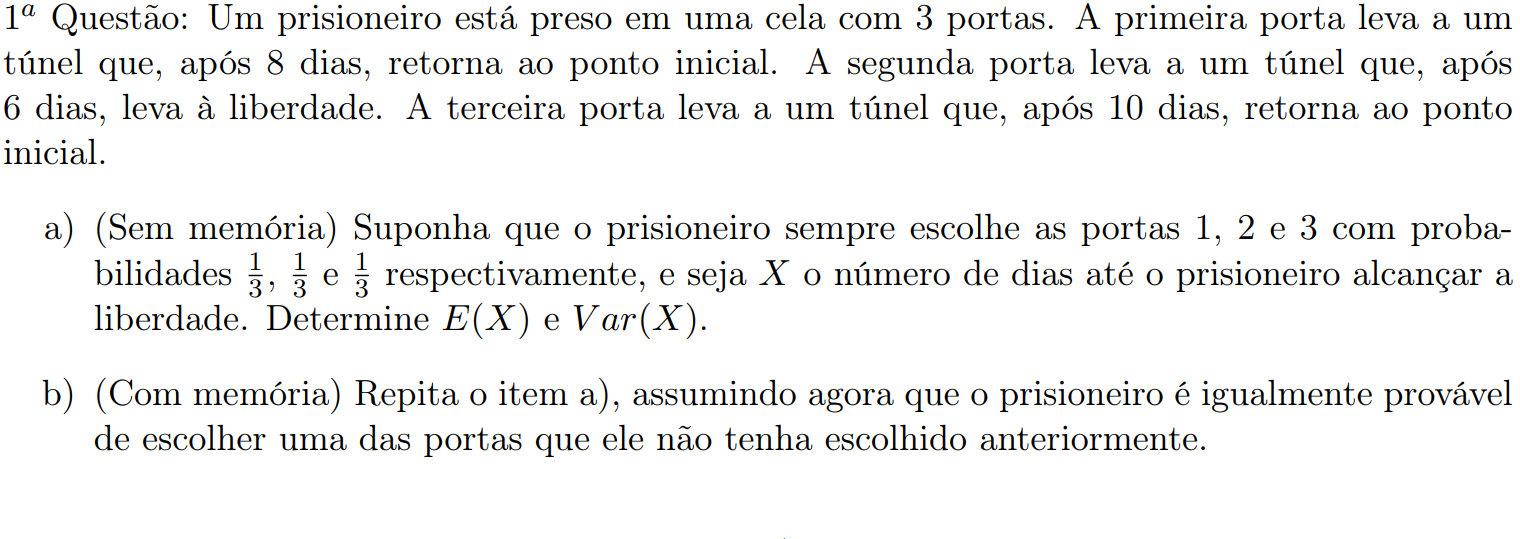

#### a) (Sem memória) 
#### R.: 
Seja N uma variável aleatória que indica a porta escolhida. Como para as portas 1 e 3, se escolhidas, retornamos ao ponto inicial, temos que:

$E[X | N = 1] = 8 + E[X]$ \
$E[X | N = 2] = 6$ \
$E[X | N = 3] = 10 + E[X]$ 

Portanto o valor esperado de X, $E[X]$ é:

$E[X] = \frac{1}{3}*(8 + E[X]) + \frac{1}{3}*6 + \frac{1}{3}*(10 + E[X]) = \frac{24}{3} + \frac{2E[X]}{3} \implies E[X] = 24$

e

$Var(X) = E[X^2] - E[X]^2$

$E[X^2 | N = 1] = E[(8 + X)^2] = 64 + 16E[X] + E[X^2] = 64 + 16*24 + E[X]^2 \implies 448 + E[X^2]$ \
$E[X^2 | N = 2] = 36$ \
$E[X^2 | N = 3] = E[(10 + X)^2] = 100 + 20E[X] + E[X^2] = 100 + 20*24 + E[X^2] \implies 580 + E[X^2]$

$\implies E[X^2] = \frac{1}{3}*(448 + E[X^2]) + \frac{1}{3}*(36) + \frac{1}{3}*(580 + E[X^2]) = \frac{1}{3}*(1064 + 2E[X^2]) \implies E[X^2] = 1064$ \
$\implies VAR(X) = 1064 - (24)^2 = 488$ 

#### b) (Com memória) 
#### R.: 
Seja N uma variável aleatória que indica a porta escolhida. Como para as portas 1 e 3, se escolhidas, retornamos ao ponto inicial mas nesse caso, não são selecionadas novamente, temos que:

$E[X | N = 1] = 8 + \frac{1}{2}*(6) + \frac{1}{2}*(10 + 6) = 19$ \
$E[X | N = 2] = 6$ \
$E[X | N = 3] = 10 + \frac{1}{2}*(6) + \frac{1}{2}*(8 + 6) = 20$ 

Portanto o valor esperado de X, $E[X]$ é:

$E[X] = \frac{1}{3}*(19) + \frac{1}{3}*6 + \frac{1}{3}*(20) = 15$

e

$Var(X) = E[X^2] - E[X]^2$

Para calcular $E[X^2]$, temos:

$E[X^2 | N = 2] = 36$

$E[X^2 | N = 1] = E[(8 + X_1)^2] = E[64 + 16X_1 + X_1^2] = 64 + 16E[X_1] + E[X_1^2]$ \
onde \
$E[X_1] =  \frac{1}{2}*6 + \frac{1}{2}*(10 + 6) = 11$ \
$E[X_1^2] = \frac{1}{2}*(10^2 + 6^2) = 68$ \
$\implies E[X^2 | N = 1] = 64 + 16*11 + 68 = 308$

e

$E[X^2 | N = 3] = E[(10 + X_3)^2] = E[100 + 20X_3 + X_3^2] = 100 + 20E[X_3] + E[X_3^2]$ \
onde \
$E[X_3] =  \frac{1}{2}*(6) + \frac{1}{2}*(8 + 6) = 10$ \
$E[X_3^2] = \frac{1}{2}*(8^2 + 6^2) = 50$ \
$\implies E[X^2 | N = 3] = 100 + 20*10 + 50 = 350$

portanto

$E[X^2] = \frac{1}{3}(36 + 308 + 350) = \frac{694}{3}$ \
$VAR(X) = \frac{694}{3} - (15)^2 = \frac{19}{3} = 6.33$




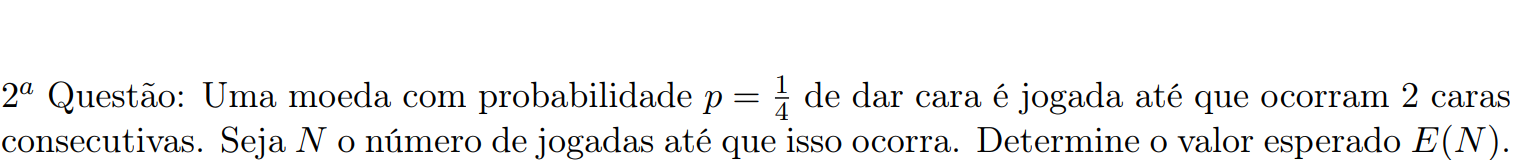

R.: Podemos definir o sistema para uma variável X, sendo X o número de caras consecutivas, como uma cadeia de markov com matriz de transição P, já na forma canônica:

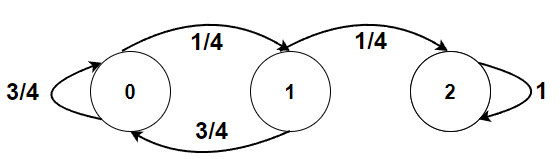

$$
P = 
\left(\begin{array}{ccc} 
3/4 & 1/4 & 0\\
3/4 & 0 & 1/4\\
0 & 0 & 1
\end{array}\right)
$$
do tipo

$$
P = 
\left(\begin{array}{c|c} 
T & A\\
\hline
0 & I
\end{array}\right)
$$
Onde T é a matrix dos estados transientes
$$
T = 
\left(\begin{array}{cc} 
3/4 & 1/4\\
3/4 & 0\\
\end{array}\right)
$$

$F$, chamada de matrix fundamental de P, é definida por $F = (I - T)^{-1}$:
$$
F = 
\left(\begin{array}{cc} 
16 & 4\\
12 & 4\\
\end{array}\right)
$$

E o número de passos dados para os estados absorventes (nesse caso apenas o último) a partir de cada estado transiente $i$ é a $i_{th}$ linha de $F*{1_\chi}$, onde $1_\chi$ é um vetor unitário do mesmo número de linhas de $F$

Portanto,
$$
F*1_2 = 
\left(\begin{array}{cc} 
16 & 4\\
12 & 4\\
\end{array}\right)*
\left(\begin{array}{c} 
1\\
1\\
\end{array}\right)=
\left(\begin{array}{c} 
20\\
16\\
\end{array}\right)
$$

e 

$E[N] = 20$

Portanto o valor esperado de passos é 20

In [373]:
P = np.array([[3/4, 1/4, 0],
               [3/4, 0, 1/4],
               [0, 0, 1]])

T = np.array([[3/4, 1/4],
               [3/4, 0]])

F = np.linalg.inv(np.identity(2)-T)
print(f'F=')
print(f'{F}')
print()
print(f'F*1 = {F@np.array([1,1])}')


F=
[[16.000 4.000]
 [12.000 4.000]]

F*1 = [20.000 16.000]


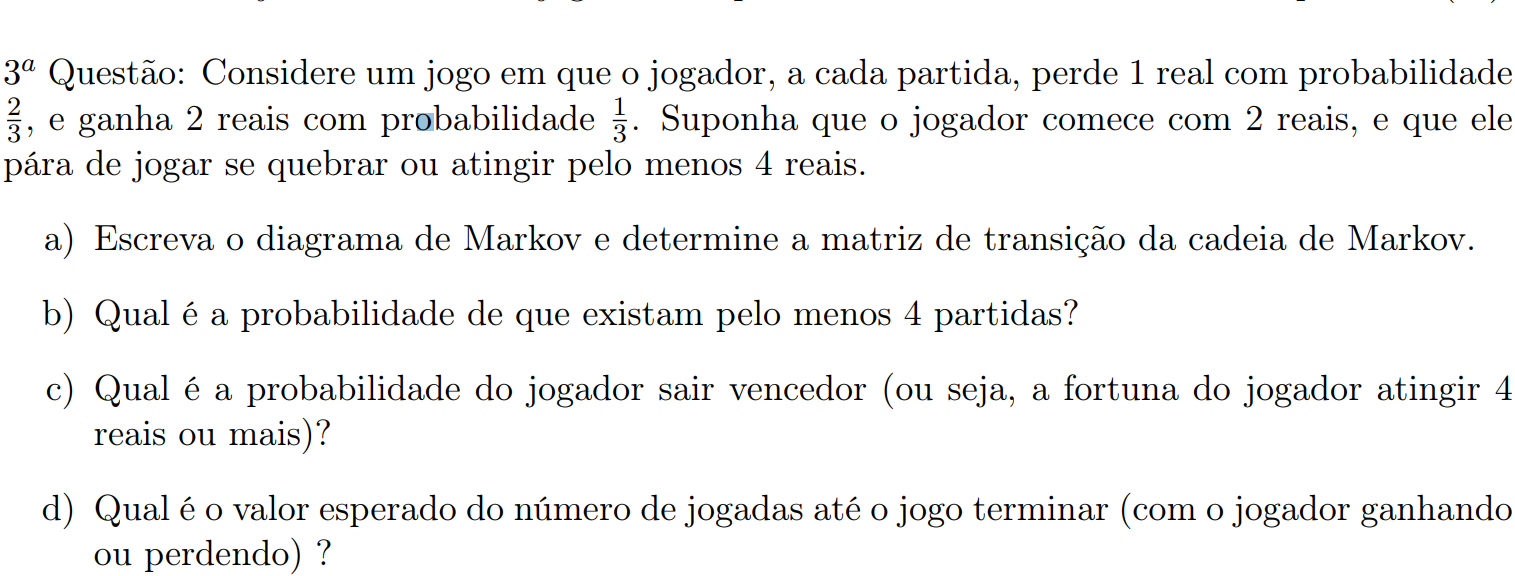

#### a) Escreva o diagrama de Markov e determine a matriz de transição da cadeia de Markov.
#### R.:
Já na forma canônica, temos 

- Os estados 1, 2 e 3 representando os montantes 1, 2 e 3 do jogador em determinado momento, nas primeiras tres linhas e colunas, como estados transientes. 
- Os montantes 0, 4 e 5 são estados absorventes, nas linhas e colunas 4, 5, 6, respectivamente
$$
P = 
\left(\begin{array}{ccc|ccc} 
0 & 0 & 1/3 & 2/3 & 0 & 0\\
2/3 & 0 & 0 & 0 & 1/3 & 0\\
0 & 2/3 & 0 & 0 & 0 & 1/3\\
\hline
0 & 0 & 0 & 1 & 0 & 0\\
0 & 0 & 0 & 0 & 1 & 0\\
0 & 0 & 0 & 0 & 0 & 1\\
\end{array}\right)
$$

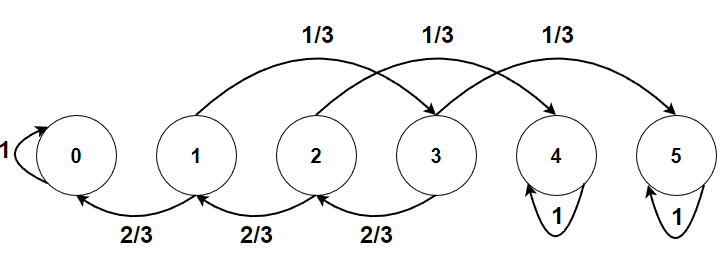

#### b) Qual é a probabilidade de que existam pelo menos 4 partidas?
#### R.: 
A probabilidade de que existam ao menos 4 partidas é dada pela soma da probabilidade dos estados transientes após 3 partidas.

Dado um vetor de estado inicial $e_0 = [0, 1, 0, 0, 0, 0]'$, a probabilidade de cada estado após $k$ jogadas é dado por $P_k = e_0*P^k$

In [376]:
k = 3

P = array([
    [0, 0, 1/3, 2/3, 0, 0],
    [2/3, 0, 0, 0, 1/3, 0],
    [0, 2/3, 0, 0, 0, 1/3],
    [0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 1],
])

e0 = array([0, 1, 0, 0, 0, 0])

# @ is matrix multiplication in numpy
pk = e0 @ matrix_power(P, k)
print(f'e0*p{k}: {pk}')

e0*p3: [0.000 0.148 0.000 0.444 0.333 0.074]


Então

$$
P_3 = e_0*P^3 = 
\left(\begin{array}{c} 
0\\ 
0.148\\ 
0\\
\hline
0.444\\ 
0.333\\
0.074\\
\end{array}\right)
$$

Ou seja, há uma probabilidade de 14.8% de haver uma próxima partida a partir da 3a partida

#### c)  Qual é a probabilidade do jogador sair vencedor (ou seja, a fortuna do jogador atingir 4 reais ou mais)?
#### R.: 

A probabilidade é dada pelo regime permanente do sistema, $R$, onde

$$
R = e_0*(I - T)^{-1}*A
$$
onde T é a matriz dos estados transientes
$$
T =
\left(\begin{array}{ccc} 
0 & 0 & 1/3 \\
2/3 & 0 & 0 \\
0 & 2/3 & 0 \\
\end{array}\right)
$$
e A é a matrix de transição dos estados transientes para um estado absorvente
$$
A =
\left(\begin{array}{ccc} 
2/3 & 0 & 0 \\
0 & 1/3 & 0 \\
0 & 0 & 1/3 \\
\end{array}\right)
$$

dado o estado inicial $e_0 = [0,1,0]$

Temos que 
$$
R = 
\left(\begin{array}{c} 
0.522\\ 
0.391\\ 
0.087\\
\end{array}\right)
$$

e os últimos 2 estados representam vitória do jogador, portanto a probabilidade de vitória é $p = 0.391+0.087 = 47.826\%$

In [387]:
T = array([[0, 0, 1/3,],
             [2/3, 0, 0,],
             [0, 2/3, 0,]])

A = array([[2/3, 0, 0],
               [0, 1/3, 0],
               [0, 0, 1/3]])

e0 = array([0, 1, 0,])
I = identity(3)
R = e0 @ inv((I-T)) @ A
print(f'R = {R}')
print('R[1]+R[2] =', round((R[1]+R[2])*100, 3),'%')

R = [0.522 0.391 0.087]
R[1]+R[2] = 47.826 %


#### d) Qual é o valor esperado do número de jogadas até o jogo terminar (com o jogador ganhando ou perdendo) ?

A matriz fundamental $F$ é 

$$
F * 1_3 = (I - T)^{-1} * 1_3 = 
\left(\begin{array}{ccc} 
1.174 & 0.261 & 0.391 \\
0.783 & 1.174 & 0.261 \\
0.522 & 0.783 & 1.174 \\
\end{array}\right)
* 
\left(\begin{array}{c} 
1\\
1\\
1\\
\end{array}\right) = 
\left(\begin{array}{c} 
1.826 \\
2.217 \\
2.478 \\
\end{array}\right)
$$

Portanto, a partir do 2o estado transiente (montante 2), o valor esperado do número de jogadas é 2.217

In [400]:
I = identity(3)
one_array = array([1,1,1]).T

print(inv((I-T)) @ one_array)

[1.826 2.217 2.478]


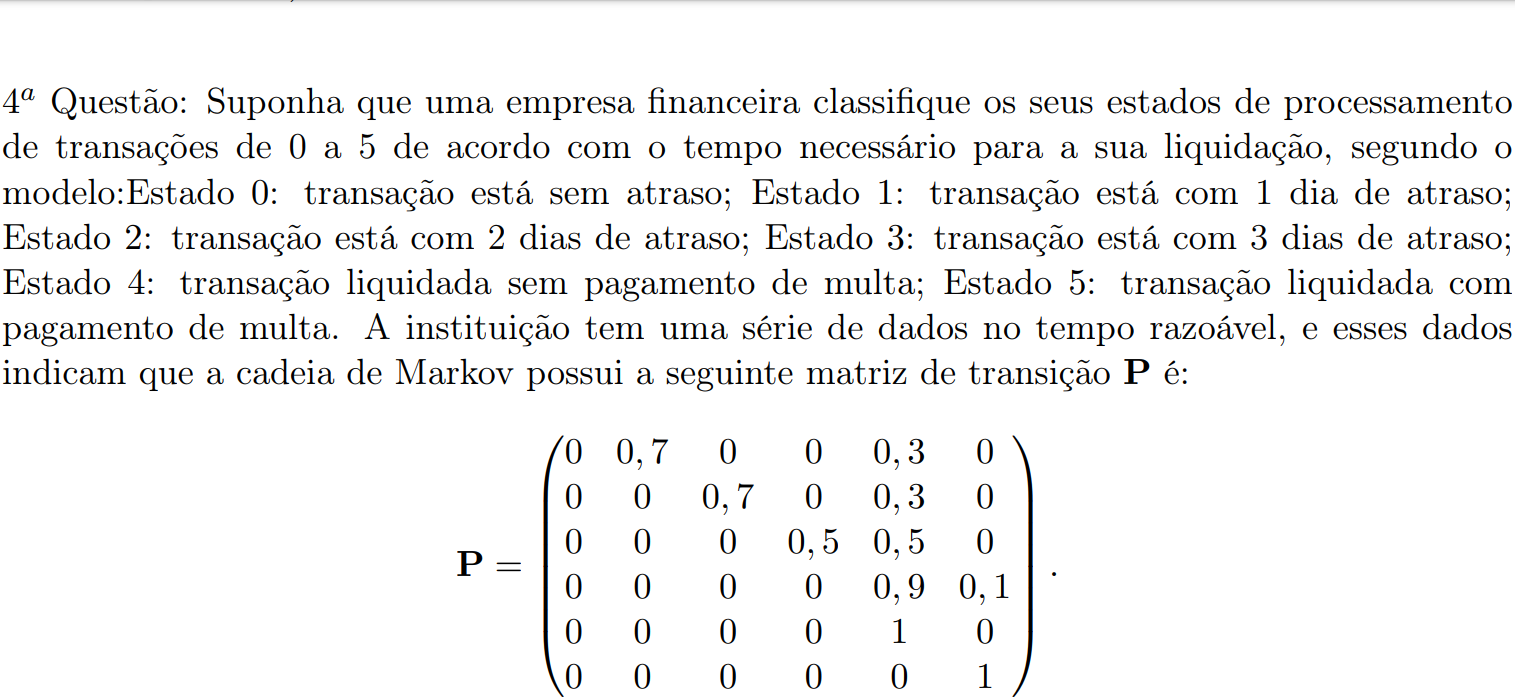
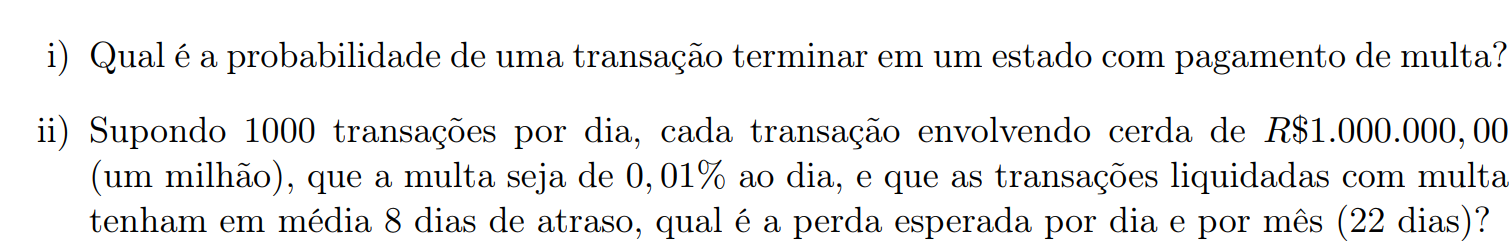

In [407]:
P = array([
    [0, 0.7, 0, 0, 0.3, 0],
    [0, 0, 0.7, 0, 0.3, 0],
    [0, 0, 0, 0.5, 0.5, 0],
    [0, 0, 0, 0,   0.9, 0.1],
    [0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 1]
])

T = array([
    [0, 0.7, 0, 0],
    [0, 0, 0.7, 0],
    [0, 0, 0, 0.5],
    [0, 0, 0, 0 ]
])

A = array([
    [0.3, 0],
    [0.3, 0],
    [0.5, 0],
    [0.9, 0.1]
])

I = identity(4)

print(f'R =\n {inv((I-T)) @ A}')

R =
 [[0.976 0.024]
 [0.965 0.035]
 [0.950 0.050]
 [0.900 0.100]]


O Regime permanente do sistema é dado por $R = (I-T)^{-1}*A$

$$
R = 
\left(\begin{array}{ccc} 
0.976 & 0.024 \\
0.965 & 0.035 \\
0.950 & 0.050 \\
0.900 & 0.100 \\
\end{array}\right)
$$

Assumindo que uma transação é sempre iniciada sem atraso (estado 0 na matriz de transação), a probabilidade de que uma transação termine em multa é de 2.4%

In [77]:
multa = 1_000_000 * ((1 + 0.01/100)**8-1)
transacoes = 1000
prob = 0.024

perda_diaria = transacoes * multa * prob
perda_mes = 22*perda_diaria
print(perda_diaria, perda_mes)

19206.721344167123 422547.8695716767


Temos que perda diária $= multa * ((1+r)^d-1) * transações * p $ e a perda do mês esperada é $perda diaria * 22$
Então

perda diária $ = 1 000 000 * ((1+0.01\%)^8 - 1) * 1000 * 0.024 = 19206.72$

perda mensal $= 22 * 19206.72 = 422547.87$

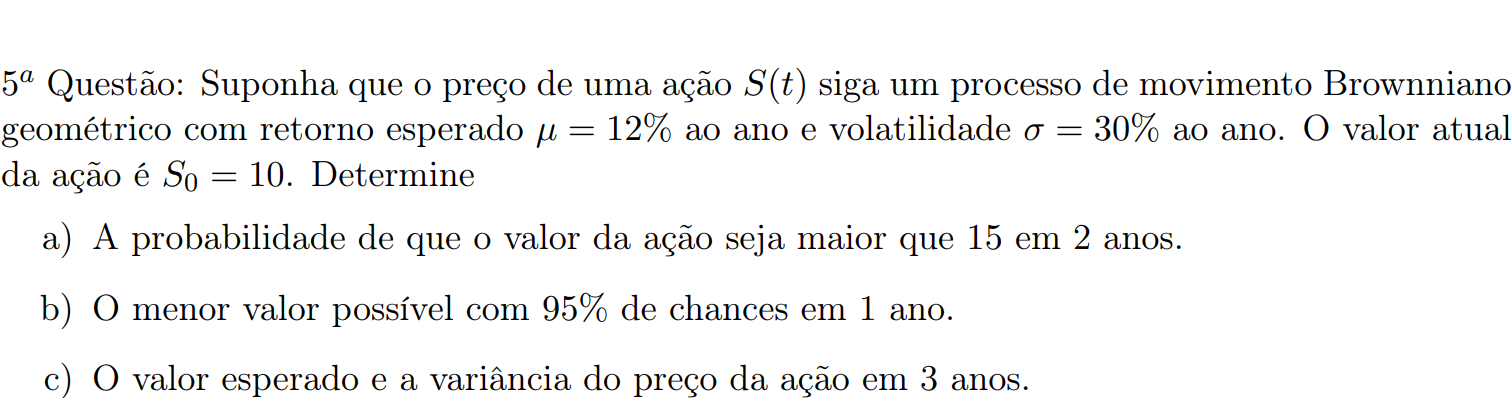



Seja $S(t)$ o valor da ação em $t$, então

$$
S(t) = S(0) \space e^{(\sigma W(t) + t(r-0.5\sigma^2))}
$$

então

$$
ln(\frac{S(t)}{S(0)}) = (\sigma W(t) + (r-\frac{1}{2}\sigma^2)t)
$$

Sendo essa a distribuição dos log-retornos

$$
ln(\frac{S(t)}{S(0)}) ∼ N( (r-\frac{1}{2}\sigma^2)t, \sigma \sqrt{t})
$$

Para $r=0.12$ e $\sigma=0.3$

$$
ln(\frac{S(t)}{S(0)}) ∼ N( 0.075t, 0.3\sqrt{t})
$$

e

$$
Z(t) = \frac{ln(\frac{S(t)}{S(0)}) - (r -\frac{1}{2}\sigma^2)t}{\sigma \sqrt{t}} ∼ N(0, 1)
$$
então
$$
Z(t) = \frac{ln(\frac{S(t)}{S(0)}) - 0.075t}{0.3\sqrt{t}} ∼ N(0, 1)
$$

#### a) 
$P(S >= 15) = 1 - P(Z \leq Z(t)) = 1 - P(Z \leq 0.60214) = 27.35\%$

A probabilidade de atingir 15 em 2 anos é 27.35%

In [425]:
t = 2 # periodos
r = 0.12 # retorno esperado
s0 = 10 # valor inicial
sigma = 0.3 # volatilidade

In [426]:
s = 15 # valor a ser atingido

z_score = (np.log(s/s0) - (r-0.5*sigma**2)*t)/(sigma*np.sqrt(t))
print(f'Z(t) score: {z_score:.5f}')

prob = 1 - norm.cdf(z_score)
print(f'Probabilidade P(Z <= Z(t)): {prob*100 :.2f}%')

Z(t) score: 0.60214
Probabilidade P(Z <= Z(t)): 27.35%


#### b)

Com 95% de chances, temos
$P(Z \leq 0.05) \implies Z(t) = -1.6449$

Para $t=1$

$Z(t) * 0.3 + 0.075 = ln(\frac{S(t)}{S(0)}) \implies S(t) = 6.580$

O valor mínimo com 95% de chances em 1 ano é 6.58

In [429]:
z_score = norm.ppf(1-0.95)
print(f'Z(t) score: {z_score:.5f}')

t = 1
minimum = z_score*(sigma*np.sqrt(t)) + (r-0.5*sigma**2)*t
print(f'Valor mínimo para Z(t) = {z_score:.5f}: {np.exp(minimum)*s0 :.2f}')

Z(t) score: -1.64485
Valor mínimo para Z(t) = -1.64485: 6.58


#### c)
Temos que:

$$
E[S(t)] = S(0) e^{rt} = 14.33
$$

e

$$
Var(S(t))= S(0)^2 e^{2rt} (e^{\sigma^2t}-1) = 63.68
$$

In [62]:
t = 3
expected = s0*np.exp(r*t)
variance = s0**2 * np.exp(2*r*t) * (np.exp(sigma**2*t)-1)
print('expected', expected)
print('variance', variance)

expected 14.333294145603402
variance 63.680126170537434


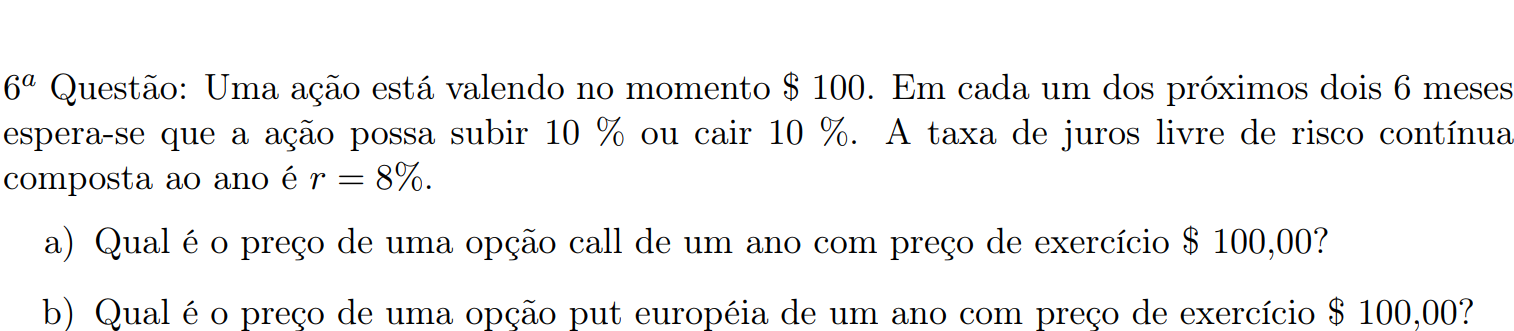

#### a) 


In [460]:
# Taxa de juros livre de risco
r = 0.08
# Fator de crescimento do ativo subjacente em caso de alta
u = 1.1
# Fator de queda do ativo subjacente em caso de baixa
d = 0.9
# Preço inicial do ativo subjacente
s0 = 100
# Preço strike
st = 100
# Período de tempo
T = 2

# Cálculo da pseudo-probabilidade livre de risco q
q = (1 + r - d) / (u - d)
print(f"Pseudo-probabilidade livre de risco q: {q :.2f}\n")

# Tabela para armazenar os resultados
table = []

# Valor esperado da opção
exp_value = 0

# Iteração reversa sobre os períodos de tempo
for t in reversed(range(0, T + 1)):

    # Cálculo da probabilidade usando a distribuição binomial
    prob = binom.pmf(t, T, q)
    # Cálculo do preço do ativo subjacente no período t
    asset = s0 * u**t * d**(T - t)
    # Cálculo do valor da opção de compra (call)
    c = max(0, asset - st)
    
    # Cálculo do valor esperado da opção
    exp_value += prob * c

    # Adiciona os valores à tabela
    table.append([t, prob, asset, c, prob * c])

print(tabulate(table, headers=['n subidas', 'prob', 'asset', 'c', 'prob*c']))
print()
print(f'Valor da opção de compra em t{T} = {exp_value :.3f}, e em t0: {exp_value * 1 / (1 + r) ** T :.3f}')

Pseudo-probabilidade livre de risco q: 0.90

  n subidas    prob    asset    c    prob*c
-----------  ------  -------  ---  --------
          2    0.81      121   21     17.01
          1    0.18       99    0      0
          0    0.01       81    0      0

Valor da opção de compra em t2 = 17.010, e em t0: 14.583


#### b)

In [445]:
# Tabela para armazenar os resultados
table = []

# Valor esperado da opção
exp_value = 0

# Iteração reversa sobre os períodos de tempo
for t in reversed(range(0, T + 1)):

    # Cálculo da probabilidade usando a distribuição binomial
    prob = binom.pmf(t, T, q)
    # Cálculo do preço do ativo subjacente no período t
    asset = s0 * u**t * d**(T - t)
    # Cálculo do valor da opção de venda (put)
    c = max(0, st - asset)
    
    # Cálculo do valor esperado da opção
    exp_value += prob * c

    # Adiciona os valores à tabela
    table.append([t, prob, asset, c, prob * c])

print(tabulate(table, headers=['n subidas', 'prob', 'asset', 'c', 'prob*c']))
print()
print(f'Valor da opção de venda em t0: {exp_value * 1 / (1 + r) ** T :.3f}')

  n subidas      prob    asset     c     prob*c
-----------  --------  -------  ----  ---------
          3  0.421875    13.31  0     0
          2  0.421875    10.89  0     0
          1  0.140625     8.91  1.09  0.153281
          0  0.015625     7.29  2.71  0.0423438

Valor da opção de venda em t0: 0.169


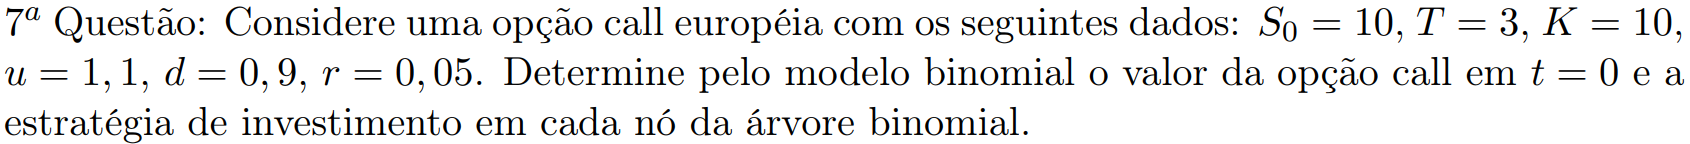

In [461]:
# Taxa de juros livre de risco
r = 0.05
# Fator de crescimento do ativo subjacente em caso de alta
u = 1.1
# Fator de queda do ativo subjacente em caso de baixa
d = 0.9
# Preço inicial do ativo subjacente
s0 = 10
# Preço do strike
st = 10
# Período de tempo
T = 3

# Cálculo da pseudo-probabilidade livre de risco q
q = (1 + r - d) / (u - d)
print(f"Pseudo-probabilidade livre de risco q: {q :.2f}\n")

# Tabela para armazenar os resultados
table = []

# Valor esperado da opção
exp_value = 0

# Iteração reversa sobre os períodos de tempo
for t in reversed(range(0, T + 1)):

    # Cálculo da probabilidade usando a distribuição binomial
    prob = binom.pmf(t, T, q)
    # Cálculo do preço do ativo subjacente no período t
    asset = s0 * u**t * d**(T - t)

    # Cálculo do valor da opção de compra (call)
    c = max(0, asset - st)

    # Cálculo do valor esperado da opção
    exp_value += prob * c

    # Adiciona os valores à tabela
    table.append([t, prob, asset, c, prob * c])

print(tabulate(table, headers=['n subidas', 'prob', 'asset', 'c', 'prob*c']))
print()
print(f'Valor da opção de compra em t0: {exp_value * 1 / (1 + r) ** T :.3f}')

Pseudo-probabilidade livre de risco q: 0.75

  n subidas      prob    asset     c    prob*c
-----------  --------  -------  ----  --------
          3  0.421875    13.31  3.31  1.39641
          2  0.421875    10.89  0.89  0.375469
          1  0.140625     8.91  0     0
          0  0.015625     7.29  0     0

Valor da opção de compra em t0: 1.531


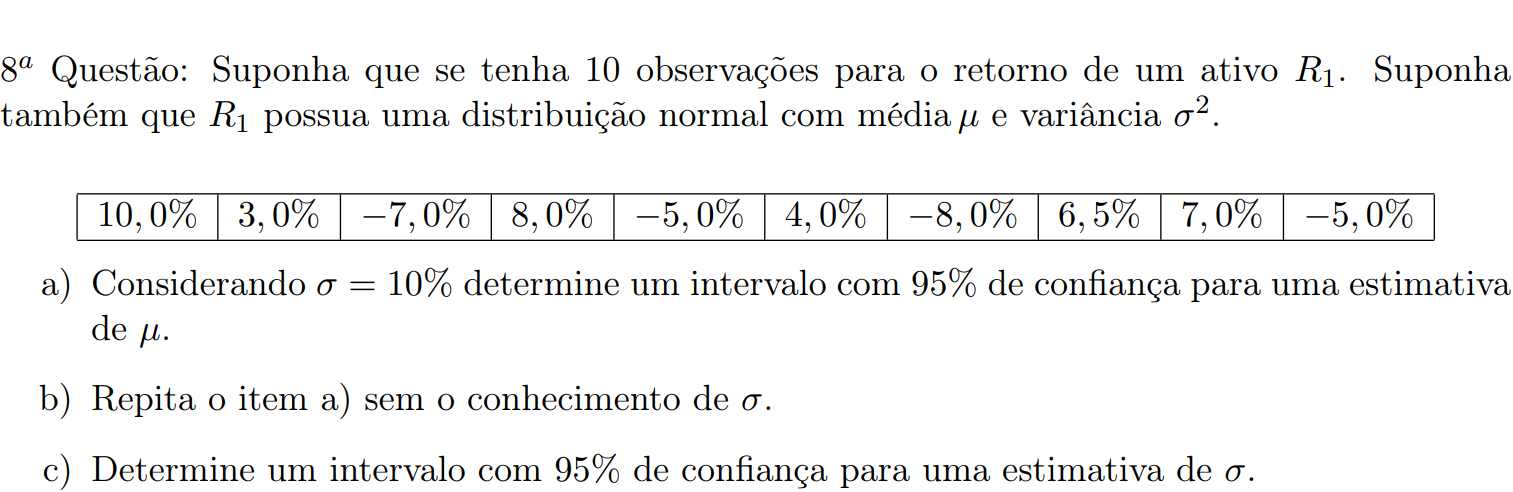

#### a)

In [448]:
retornos = np.array([10, 3, -7, 8, -5, 4, -8, 6.5, 7, -5])/100
# retornos = [5, 8.5, 12, 15, 7, 9, 7.5, 6.5, 10.5]
# retornos = [0.123,0.124,0.126,0.120,0.130,0.133,0.125,0.128,0.124,0.126]

intervalo_confianca = 0.95
sigma = 0.1

n = len(retornos) # numero de observações
graus_de_liberdade = n-1 # graus de liberdade

media_amostral = np.mean(retornos) # media amostral

alpha = (1-intervalo_confianca)/2
z_score = np.abs(norm.ppf(alpha))

print(f'Média Amostral: {media_amostral:.4f}')
print(f'z_score: {z_score:.4f}')
print(f'Intervalo para média amostral: ({media_amostral-z_score*sigma/np.sqrt(n):.4f}, {media_amostral+z_score*sigma/np.sqrt(n):.4f})')

Média Amostral: 0.0135
z_score: 1.9600
Intervalo para média amostral: (-0.0485, 0.0755)


#### b)

In [314]:

variancia_amostral = 1/(graus_de_liberdade)*np.sum((retornos-media_amostral)**2)
t_score = np.abs(t_student.ppf(alpha, graus_de_liberdade))
normalized_variance = t_score*np.sqrt(variancia_amostral)/np.sqrt(n)

print(f's²: {variancia_amostral :.4f}')
print(f't_score: {t_score :.4f}')
print(f'Intervalo para média amostral: ({media_amostral-normalized_variance :.4f}, {media_amostral+normalized_variance :.4f})')

s²: 0.0047
t_score: 2.2622
Intervalo para média amostral: (-0.0357, 0.0627)


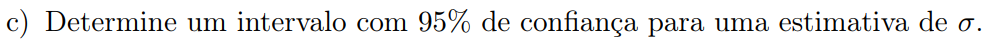

In [315]:
from scipy.stats import chi2, ncx2

lower_chi = chi2.ppf(alpha, graus_de_liberdade)
upper_chi = chi2.ppf((1-alpha), graus_de_liberdade)

lower_band = dof*(variancia_amostral)/upper_chi
upper_band = dof*(variancia_amostral)/lower_chi

print(f'S:{np.sqrt(variancia_amostral)}')
print(f'chi²({alpha :.3f}, {graus_de_liberdade}): {lower_chi :.4f}')
print(f'chi²({1-alpha :.3f}, {graus_de_liberdade}): {upper_chi :.4f}')
print(f'Intervalo para sigma²: ({lower_band :.5f}, {upper_band :.5f})')
print(f'Intervalo para sigma: ({np.sqrt(lower_band ) :.5f}, {np.sqrt(upper_band ) :.5f})')

S:0.06872044819411469
chi²(0.025, 9): 2.7004
chi²(0.975, 9): 19.0228
Intervalo para sigma²: (0.00223, 0.01574)
Intervalo para sigma: (0.04727, 0.12546)


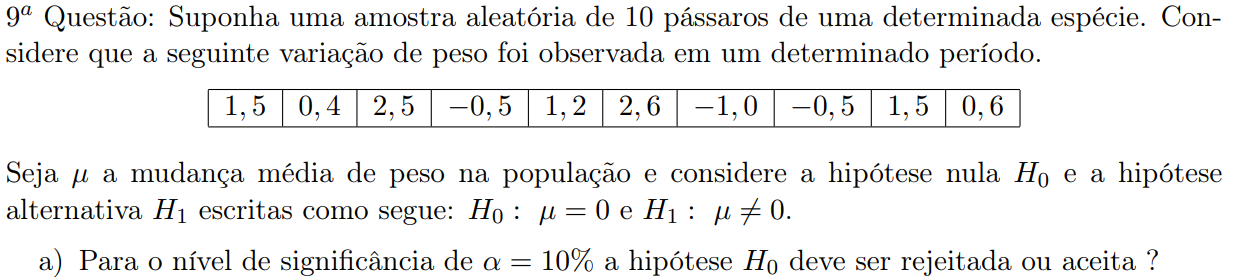

In [308]:
delta_p = [1.5, 0.4, 2.5, -0.5, 1.2, 2.6, -1, -0.5, 1.5, 0.6]
# delta_p = [1.9, 0.7, 2.2, -0.1, 2, 1, -0.8, -0.2, 1.8, 0.3]

n = len(delta_p) # numero de observações
graus_de_liberdade = n-1 # graus de liberdade
media_amostral = np.mean(delta_p)
variancia_amostral = 1/(graus_de_liberdade)*np.sum((delta_p-media_amostral)**2)

conf = 0.9
alpha = (1-conf)/2
mu_0 = 0
t_score = np.abs(t_student.ppf(alpha, graus_de_liberdade))

print(media_amostral, variancia_amostral, np.sqrt(variancia_amostral))
print(t_score)
print(np.abs(media_amostral-mu_0), t_score*np.sqrt(variancia_amostral)/np.sqrt(n))
reject_test = np.abs(media_amostral-mu_0) > t_score*np.sqrt(variancia_amostral)/np.sqrt(n)
if reject_test:
    print('Rejeita a hipótese H0, ou seja, houve uma mudança estatisticamente significativa de peso dos pássaros')
else:
    print('Aceita a hipótese H0, ou seja, não houve uma mudança estatisticamente significativa de peso dos pássaros')

0.8299999999999998 1.5645555555555555 1.250821951980199
1.833112932653634
0.8299999999999998 0.7250779795534708
Rejeita a hipótese H0, ou seja, houve uma mudança estatisticamente significativa de peso dos pássaros


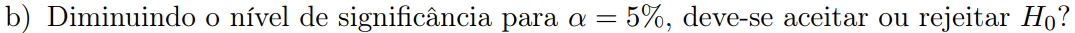

In [310]:
conf = 0.95
alpha = (1-conf)/2
mu_0 = 0
t_score = np.abs(t_student.ppf(alpha, graus_de_liberdade))
print(media_amostral, variancia_amostral, np.sqrt(variancia_amostral))
print(t_score)
print(np.abs(media_amostral-mu_0), t_score*np.sqrt(variancia_amostral)/np.sqrt(n))
reject_test = np.abs(media_amostral-mu_0) > t_score*np.sqrt(variancia_amostral)/np.sqrt(n)
if reject_test:
    print('Rejeita a hipótese H0, ou seja, houve uma mudança estatisticamente significativa de peso dos pássaros')
else:
    print('Não rejeita a hipótese H0, ou seja, não houve uma mudança estatisticamente significativa de peso dos pássaros')

0.8299999999999998 1.5645555555555555 1.250821951980199
2.2621571627409915
0.8299999999999998 0.8947841214661121
Não rejeita a hipótese H0, ou seja, não houve uma mudança estatisticamente significativa de peso dos pássaros


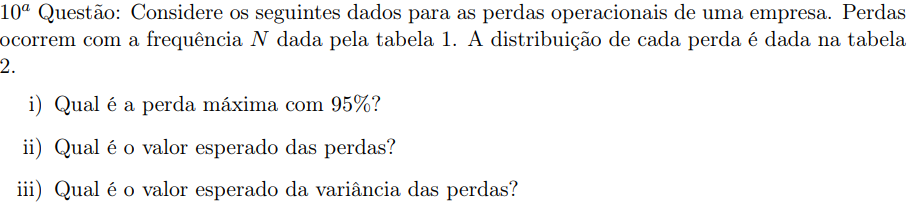
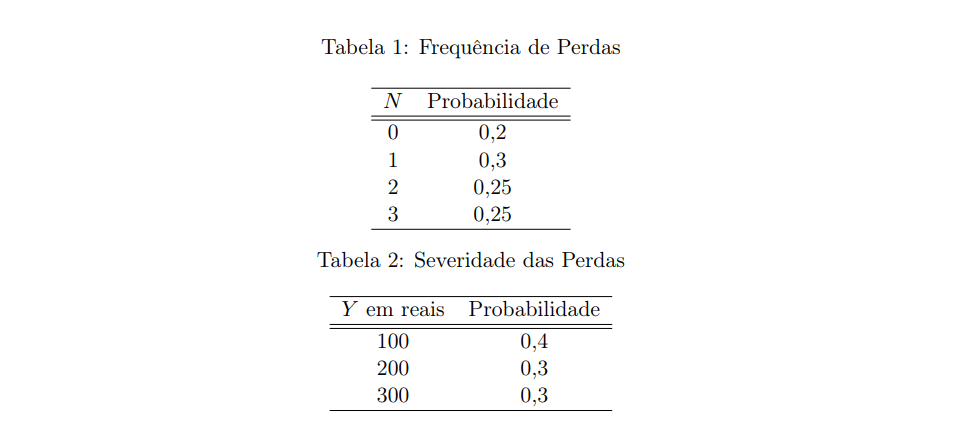